<a href="https://colab.research.google.com/github/SolFreire/SegmentacaoSemanticaCNNMitochondrias/blob/main/Segmena%C3%A7%C3%A3oSemanticaCNNMitochondria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.utils import normalize
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [2]:
!wget https://www.dropbox.com/s/rntsian2o49lzc5/256.zipp?d1=1 -O 256.zip
!mkdir -p tmp/mitochondria/

local_zip = '256.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/mitochondria/')
zip_ref.close()


--2025-08-28 13:34:22--  https://www.dropbox.com/s/rntsian2o49lzc5/256.zipp?d1=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/bkww2r1vsoa8dy6yx5gzl/256.zipp?d1=1&rlkey=s4l72ao0knv40wybn1ceut8lq [following]
--2025-08-28 13:34:23--  https://www.dropbox.com/scl/fi/bkww2r1vsoa8dy6yx5gzl/256.zipp?d1=1&rlkey=s4l72ao0knv40wybn1ceut8lq
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf91fc392a3f6ae617066023266.dl.dropboxusercontent.com/cd/0/inline/CwR98IWx2BysROPy2cC-iGvm9VpXeXyxSnMBpCko6c4Y9B0x8NiVx0IEVfoEaPPMD-u-oRkOG1gGCRLbR18UpNiCu20gVwrJWUlOIADs9PSerlosX3J3M3JvAV3mBNimkx8/file# [following]
--2025-08-28 13:34:24--  https://ucf91fc392a3f6ae617066023266.dl.dropboxusercontent.com/cd/0/inline/CwR98IWx2BysROPy2

In [3]:
image_directory = 'tmp/mitochondria/256/images/'
mask_directory = 'tmp/mitochondria/256/masks/'

In [4]:
SIZE = 256
num_images = 500

In [5]:
image_names = glob.glob("tmp/mitochondria/256/images/*.tif")
print(image_names)



['tmp/mitochondria/256/images/image_70_20.tif', 'tmp/mitochondria/256/images/image_51_01.tif', 'tmp/mitochondria/256/images/image_133_20.tif', 'tmp/mitochondria/256/images/image_73_12.tif', 'tmp/mitochondria/256/images/image_18_12.tif', 'tmp/mitochondria/256/images/image_118_01.tif', 'tmp/mitochondria/256/images/image_143_23.tif', 'tmp/mitochondria/256/images/image_26_12.tif', 'tmp/mitochondria/256/images/image_81_11.tif', 'tmp/mitochondria/256/images/image_102_22.tif', 'tmp/mitochondria/256/images/image_154_13.tif', 'tmp/mitochondria/256/images/image_27_00.tif', 'tmp/mitochondria/256/images/image_112_02.tif', 'tmp/mitochondria/256/images/image_126_12.tif', 'tmp/mitochondria/256/images/image_52_00.tif', 'tmp/mitochondria/256/images/image_36_01.tif', 'tmp/mitochondria/256/images/image_126_23.tif', 'tmp/mitochondria/256/images/image_153_20.tif', 'tmp/mitochondria/256/images/image_138_13.tif', 'tmp/mitochondria/256/images/image_4_02.tif', 'tmp/mitochondria/256/images/image_0_22.tif', 'tmp

In [6]:
image_names = sorted(image_names)
print(image_names)
image_names_subset = image_names[0:num_images]
images = [cv2.imread(img,0)for img in image_names_subset]
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis=3)


['tmp/mitochondria/256/images/image_0_00.tif', 'tmp/mitochondria/256/images/image_0_01.tif', 'tmp/mitochondria/256/images/image_0_02.tif', 'tmp/mitochondria/256/images/image_0_03.tif', 'tmp/mitochondria/256/images/image_0_10.tif', 'tmp/mitochondria/256/images/image_0_11.tif', 'tmp/mitochondria/256/images/image_0_12.tif', 'tmp/mitochondria/256/images/image_0_13.tif', 'tmp/mitochondria/256/images/image_0_20.tif', 'tmp/mitochondria/256/images/image_0_21.tif', 'tmp/mitochondria/256/images/image_0_22.tif', 'tmp/mitochondria/256/images/image_0_23.tif', 'tmp/mitochondria/256/images/image_100_00.tif', 'tmp/mitochondria/256/images/image_100_01.tif', 'tmp/mitochondria/256/images/image_100_02.tif', 'tmp/mitochondria/256/images/image_100_03.tif', 'tmp/mitochondria/256/images/image_100_10.tif', 'tmp/mitochondria/256/images/image_100_11.tif', 'tmp/mitochondria/256/images/image_100_12.tif', 'tmp/mitochondria/256/images/image_100_13.tif', 'tmp/mitochondria/256/images/image_100_20.tif', 'tmp/mitochondr

In [7]:
mask_names = glob.glob(mask_directory + "*.tif")
mask_names = sorted(mask_names)
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask,0)for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis=3)

In [8]:
print("Dimensões da imagem são: ", image_dataset.shape)
print("Dimensões da máscara são: ", mask_dataset.shape)
print("Pixel Máximo na imagem: " ,image_dataset.max())
print("Pixel Mínimo na imagem: " ,image_dataset.min())
print("Rótulos na imagem são: ", np.unique(mask_dataset))

Dimensões da imagem são:  (500, 256, 256, 1)
Dimensões da máscara são:  (500, 256, 256, 1)
Pixel Máximo na imagem:  225
Pixel Mínimo na imagem:  34
Rótulos na imagem são:  [  0 255]


In [9]:
image_dataset = image_dataset /255.
mask_dataset = mask_dataset /255.


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

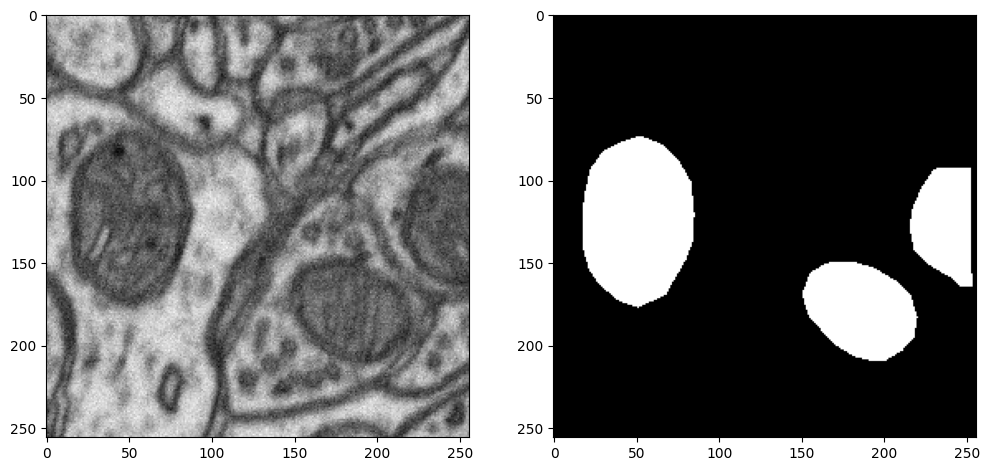

In [13]:
import random

image_number = random.randint(0, len(x_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(x_train[image_number, :,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number, :,:,0], cmap='gray')
plt.show()


In [14]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:
        activation = 'sigmoid'
    else:
        activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [15]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)


In [16]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,054,145 (118.46 MB)

 Trainable params: 31,042,369 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)